In [6]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')

In [7]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [8]:
train.sample(6)

Id  Province_State  Country_Region        Date  ConfirmedCases  \
34209  34210  Cayman Islands  United Kingdom  2020-03-16             1.0   
19829  19830             NaN       Mauritius  2020-03-11             0.0   
31964  31965     Puerto Rico              US  2020-05-10          2198.0   
17024  17025             NaN           Japan  2020-01-26             4.0   
31811  31812    Pennsylvania              US  2020-04-02          7268.0   
33587  33588             NaN         Ukraine  2020-01-29             0.0   

       Fatalities  
34209         1.0  
19829         0.0  
31964       111.0  
17024         0.0  
31811        90.0  
33587         0.0

In [9]:
test.sample(6)    

ForecastId Province_State  Country_Region        Date
9454         9455            NaN         Somalia  2020-05-09
68             69            NaN         Albania  2020-04-27
12696       12697        Bermuda  United Kingdom  2020-04-13
3913         3914            NaN   Cote d'Ivoire  2020-04-02
6372         6373            NaN           Japan  2020-04-10
7199         7200            NaN        Malaysia  2020-04-20

In [14]:
df = train.fillna('NA').groupby(['Country_Region','Province_State','Date'])['ConfirmedCases'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

ConfirmedCases
Country_Region                
US                   1442653.0
Russia                262843.0
United Kingdom        238005.0
Spain                 230183.0
Italy                 223885.0
Brazil                220291.0
France                179630.0
Germany               175233.0
Turkey                146457.0
Iran                  116635.0

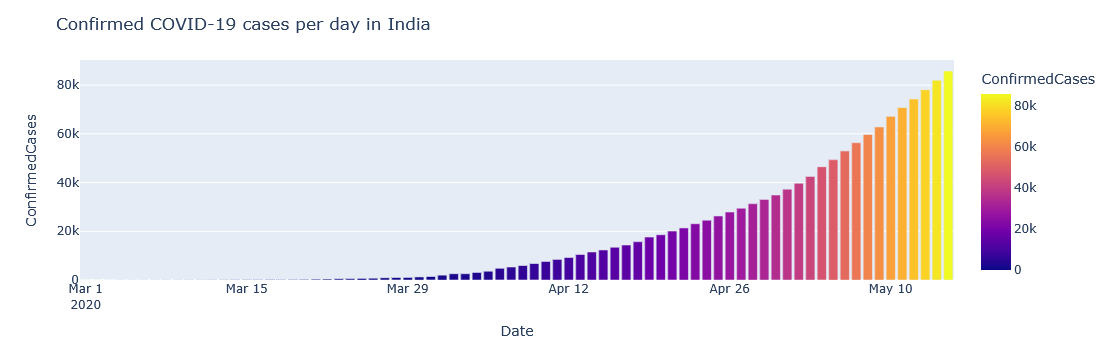

In [16]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'India') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases")
fig.update_layout(title_text='Confirmed COVID-19 cases per day in India')
fig.show()


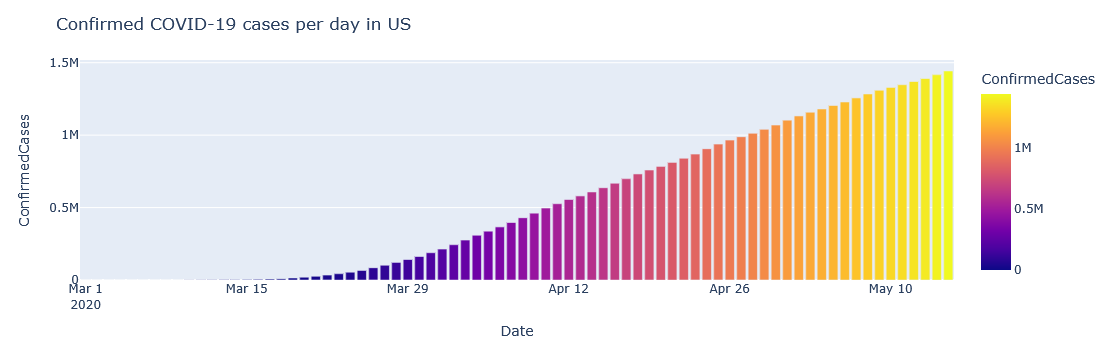

In [17]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'US') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases")
fig.update_layout(title_text='Confirmed COVID-19 cases per day in US')
fig.show()

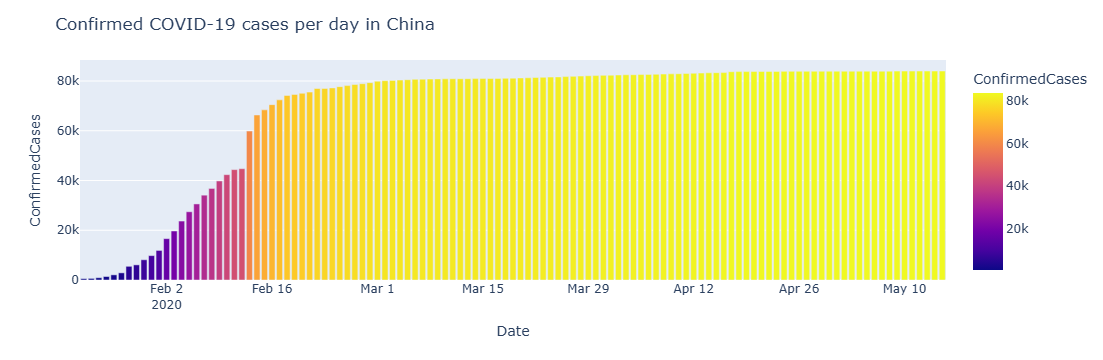

In [18]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'China') &(df_by_date.Date >= '2020-01-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases")
fig.update_layout(title_text='Confirmed COVID-19 cases per day in China')
fig.show()

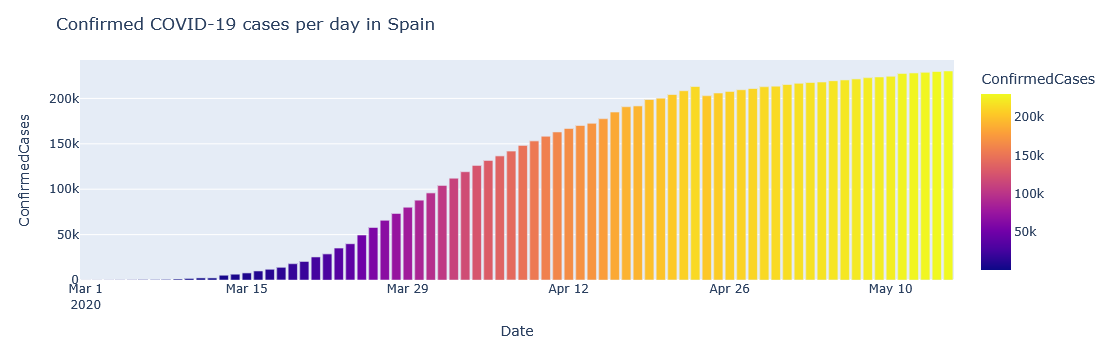

In [22]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Spain') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases")
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Spain')
fig.show()

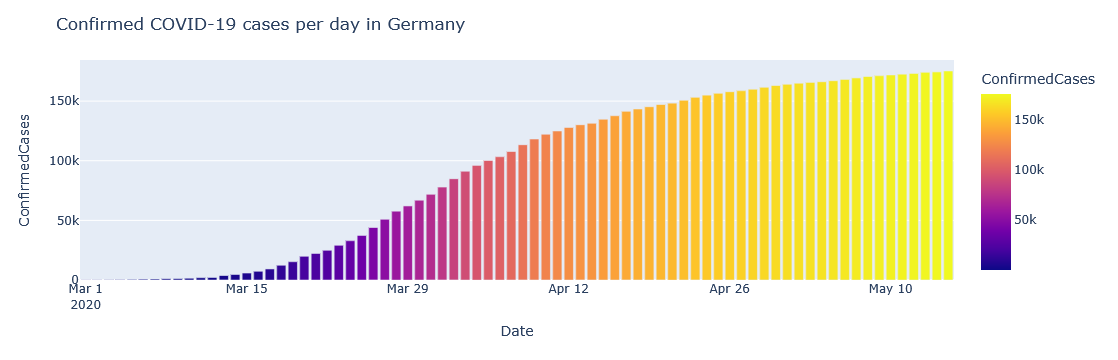

In [24]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Germany') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases")
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Germany')
fig.show()

In [26]:
df=train.groupby(['Date','Country_Region']).agg('sum').reset_index()
df.tail(5)

Date      Country_Region     Id Province_State  ConfirmedCases  \
21155  2020-05-15             Vietnam  35535              0           314.0   
21156  2020-05-15  West Bank and Gaza  35650              0           375.0   
21157  2020-05-15      Western Sahara  35765              0             6.0   
21158  2020-05-15              Zambia  35880              0           654.0   
21159  2020-05-15            Zimbabwe  35995              0            42.0   

       Fatalities  
21155         0.0  
21156         2.0  
21157         0.0  
21158         7.0  
21159         4.0

In [28]:
def pltCountry_cases(ConfirmedCases,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['ConfirmedCases'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of cases' )

In [38]:
def pltCountry_fatalities(Fatalities,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['Fatalities'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of fatalities' )

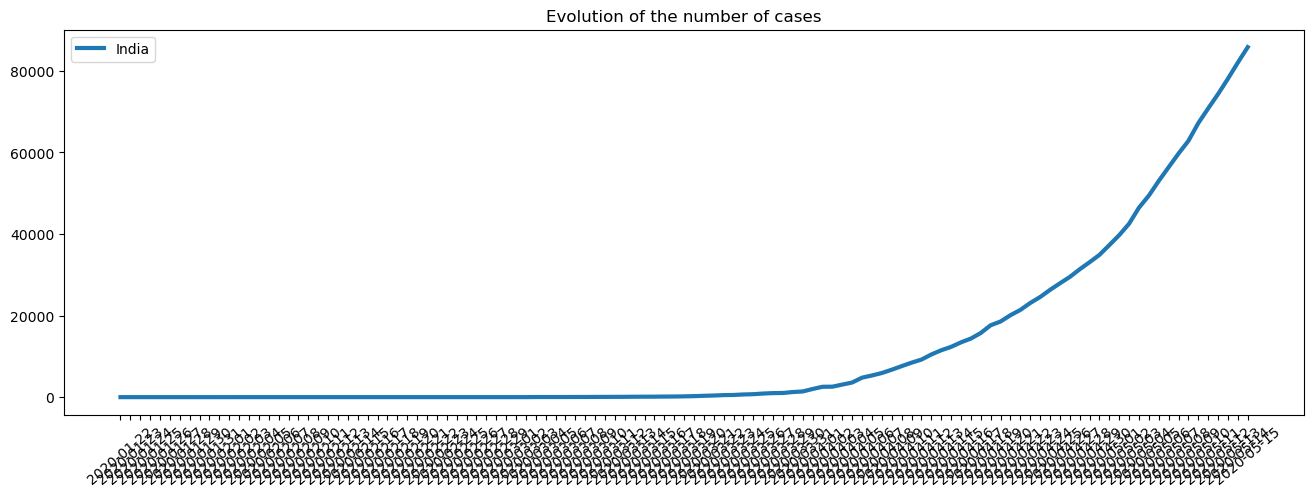

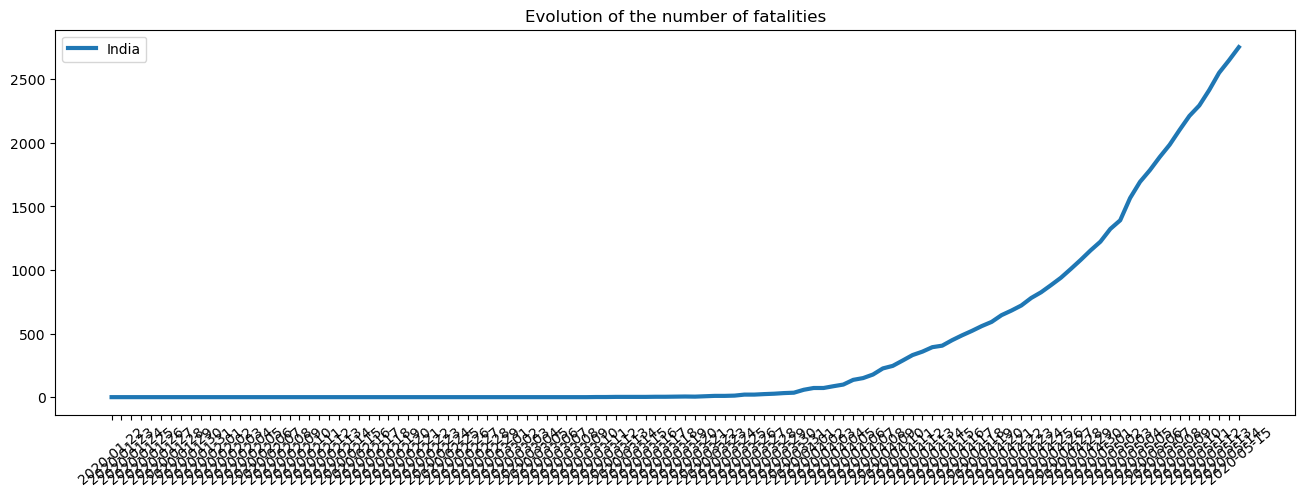

In [40]:
pltCountry_cases('ConfirmedCases','India')
plt.show()
pltCountry_fatalities('Fatalities','India')
plt.show()

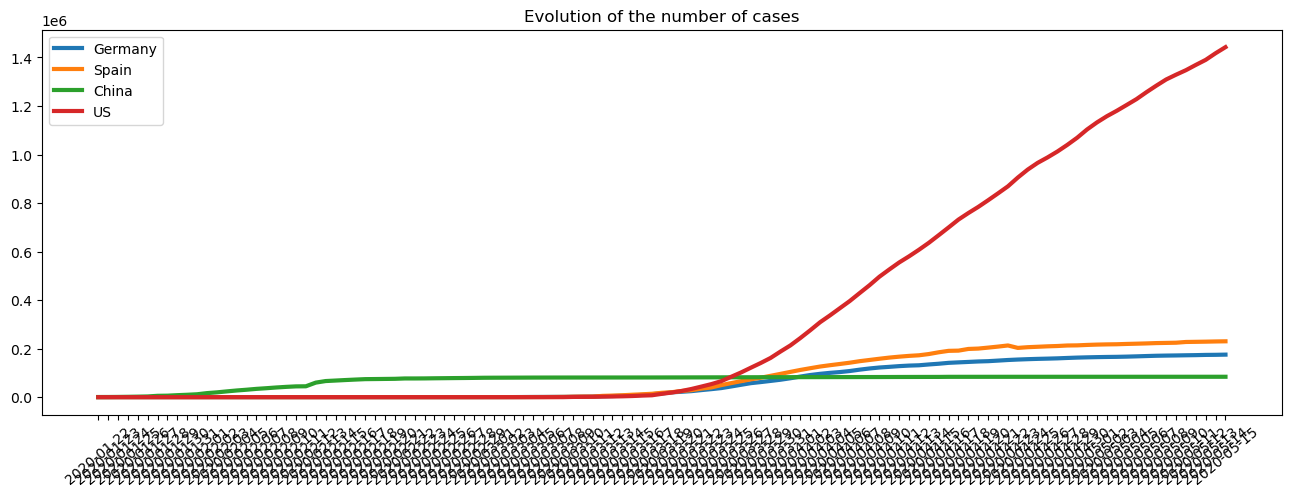

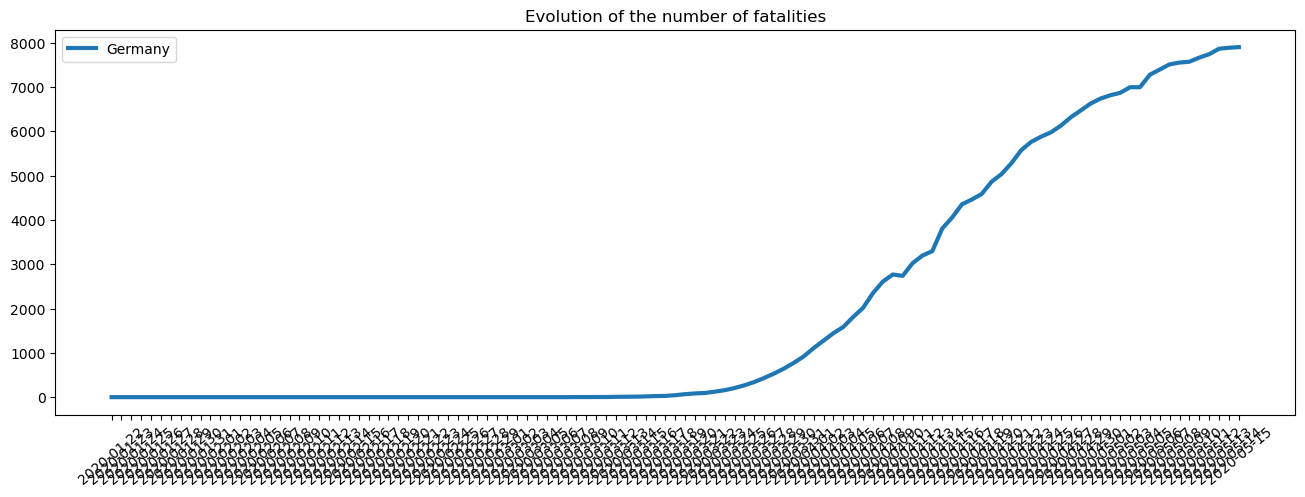

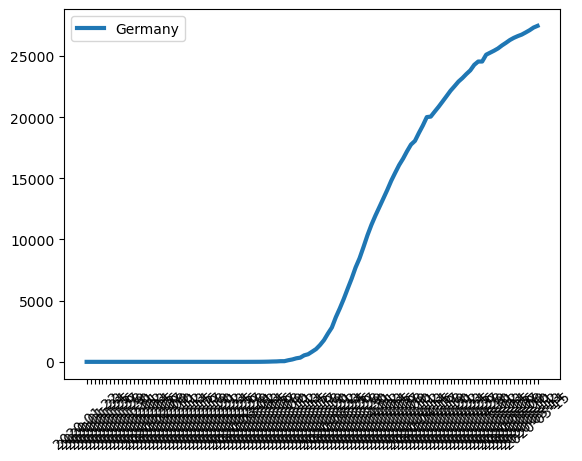

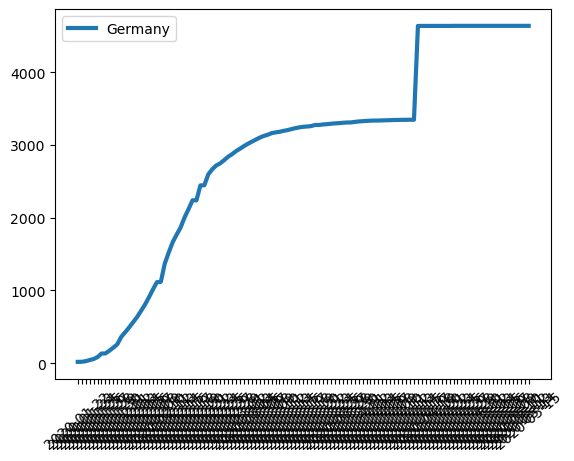

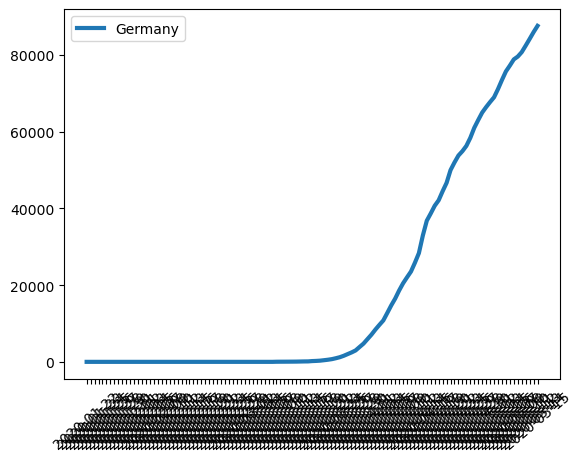

In [46]:
pltCountry_cases('ConfirmedCases', 'Germany','Spain','China','US')
pltCountry_fatalities('Fatilities','Germany','Spain','China','US')

In [44]:
test['Date'] = pd.to_datetime(test['Date'])
train['Date'] = pd.to_datetime(train['Date'])

In [48]:
case='ConfirmedCases'
def timeCompare(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df.loc[(df['Country_Region']==Coun1)]
    plt.plot(country['Date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df.loc[df['Country_Region']==Coun2]
    plt.plot(country2['Date'],country2[case],linewidth=2)
    plt.legend(labels)
    ax.set(title=' Cases in India Vs Cases in %s '%argv[1] ,ylabel='Number of %s cases'%case, xlabel='Time' )

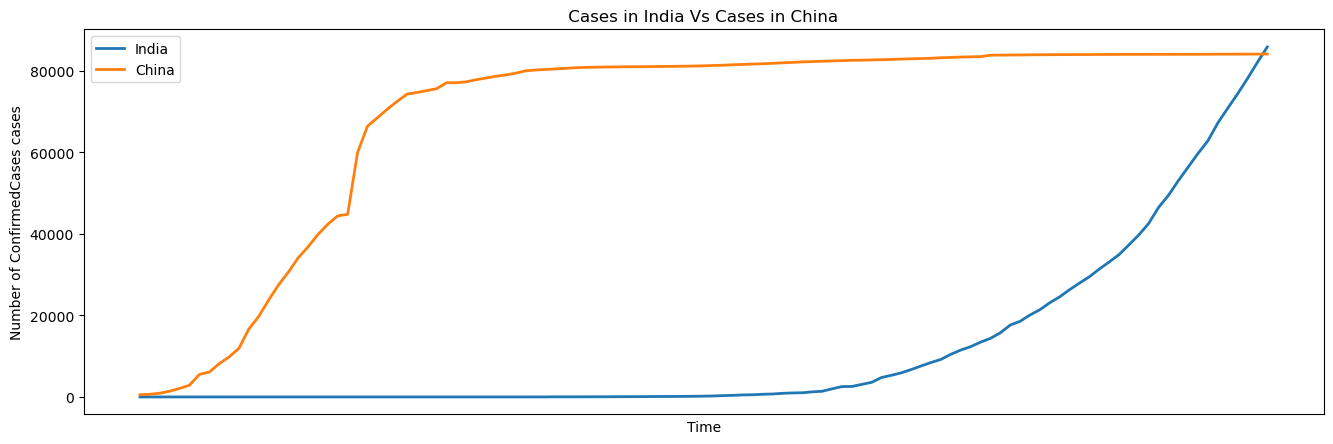

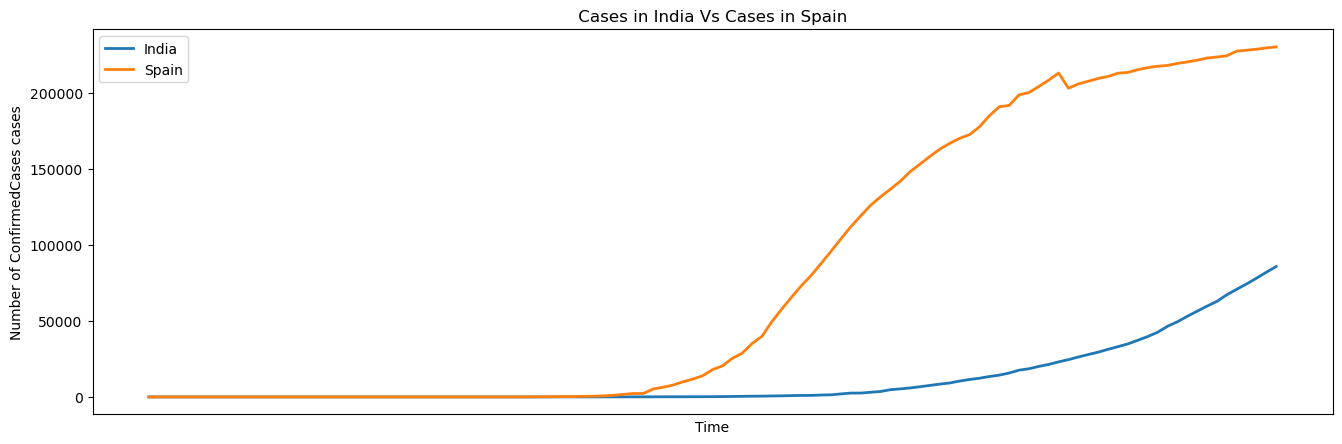

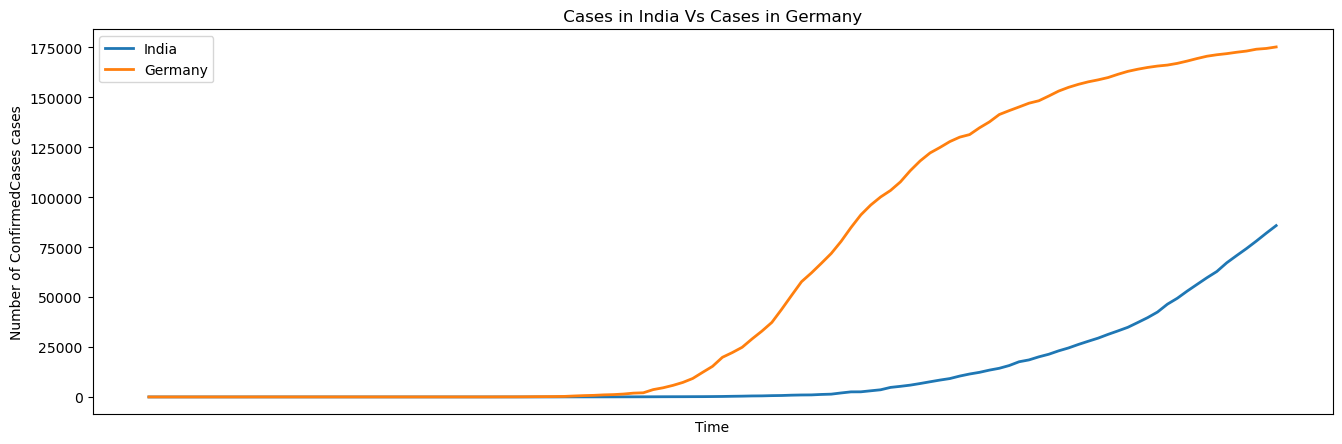

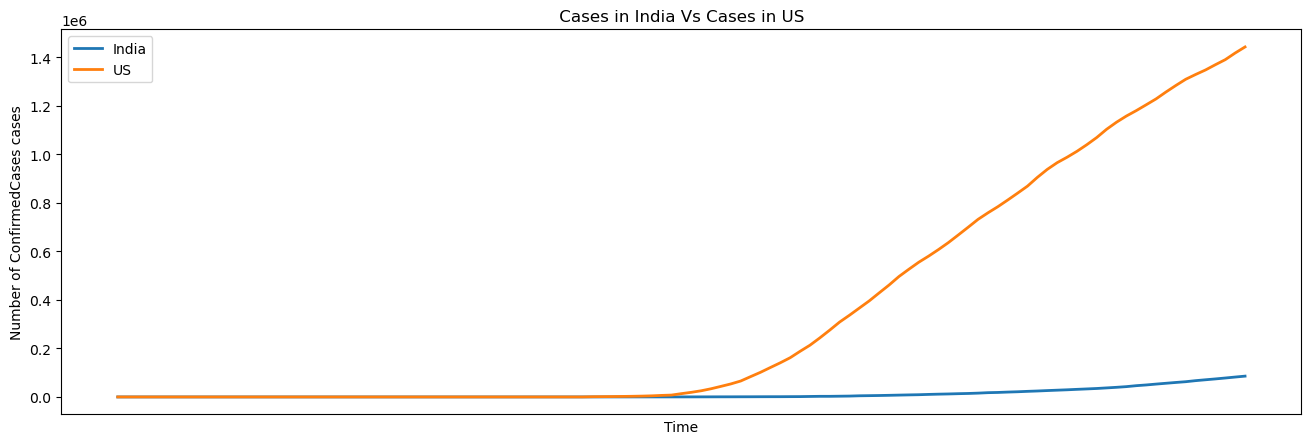

In [58]:
timeCompare(7,'India','China')
timeCompare(7,'India','Spain')
timeCompare(7,'India','Germany')
timeCompare(7,'India','US')
plt.show()

In [60]:
case='Fatalities'
def timeCompare_f(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df.loc[(df['Country_Region']==Coun1)]
    plt.plot(country['Date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df.loc[df['Country_Region']==Coun2]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country2['Date'],country2[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Fatalities in India Vs Fatalities in %s '%argv[1] ,ylabel='Number of %s cases'%case, xlabel='Time' )

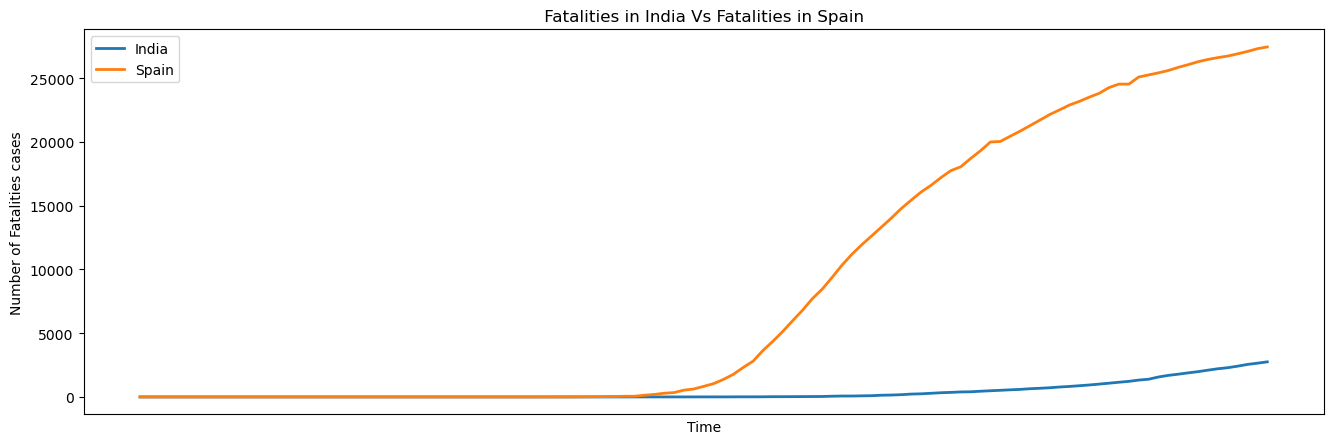

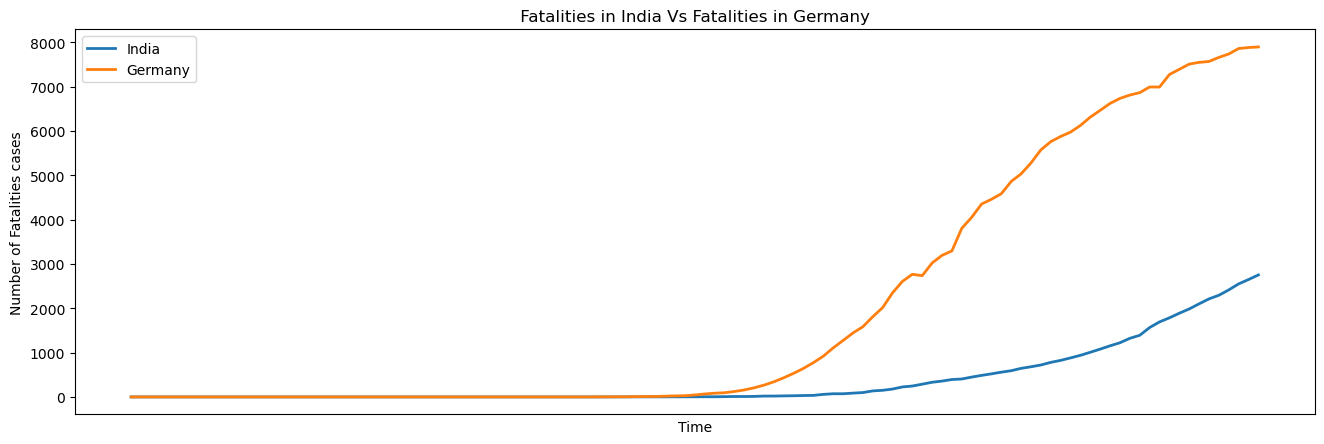

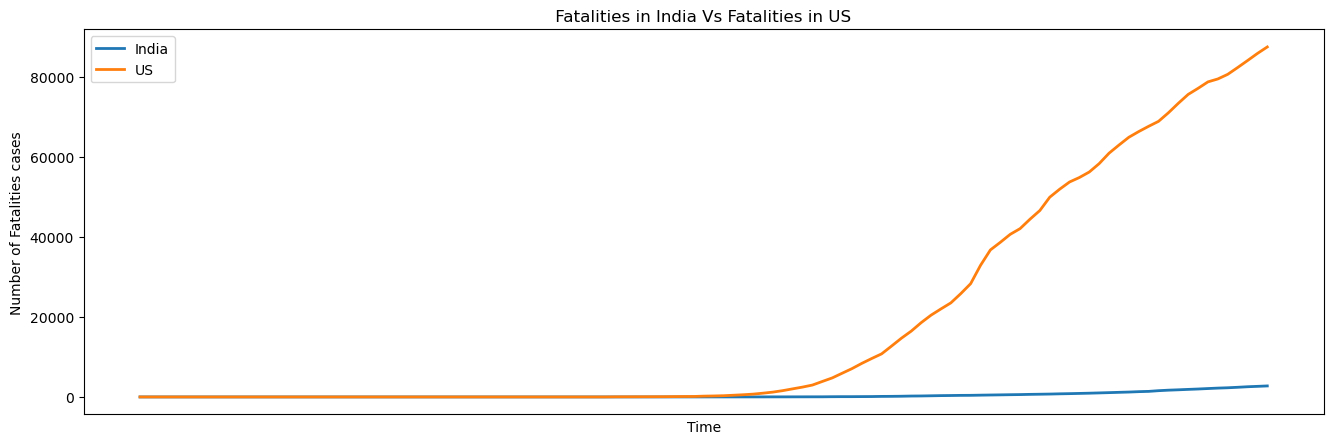

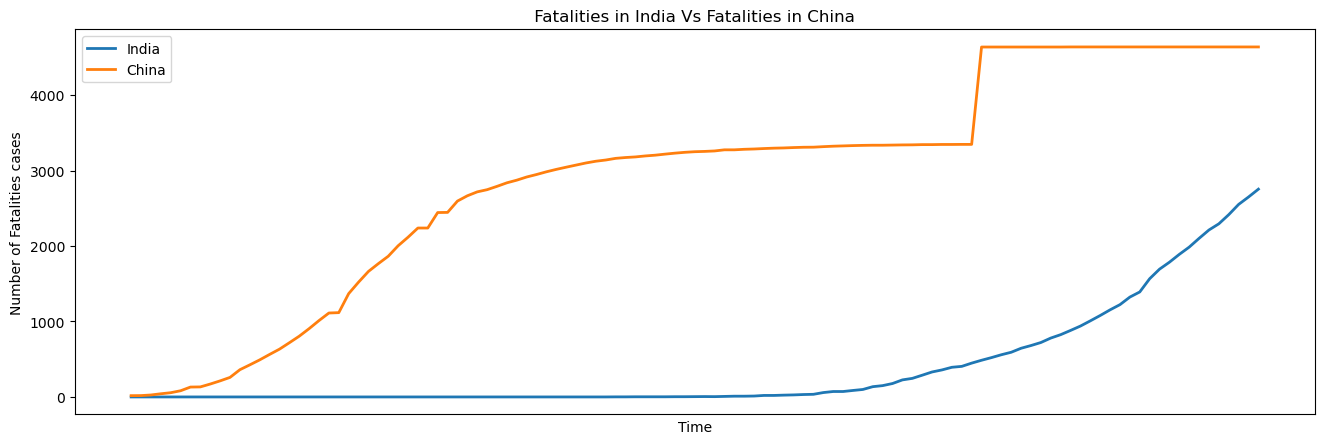

In [62]:
timeCompare_f(7,'India','Spain')
timeCompare_f(7,'India','Germany')
timeCompare_f(7,'India','US')
timeCompare_f(7,'India','China')
plt.show()

## ARIMA¶


In [65]:
def roll(country,case='ConfirmedCases'):
    ts=df.loc[(df['Country_Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['ConfirmedCases']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlot(country, case='ConfirmedCases'):
    ts=df.loc[(df['Country_Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['ConfirmedCases']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(16,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case])
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    plt.legend()
    plt.title('Cases distribution in %s with rolling mean and standard' %country)
    plt.xticks([])

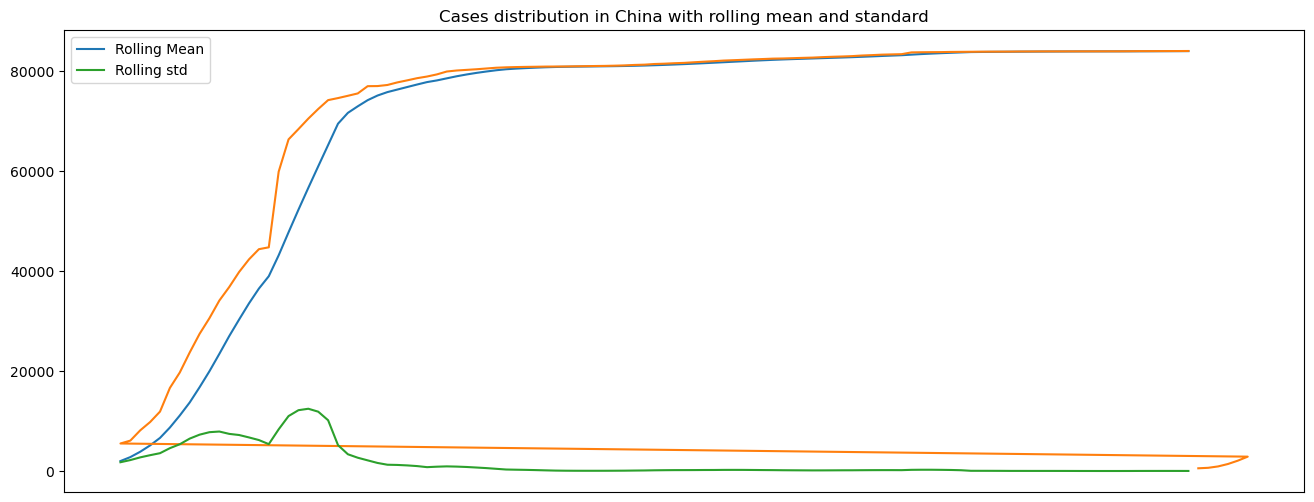

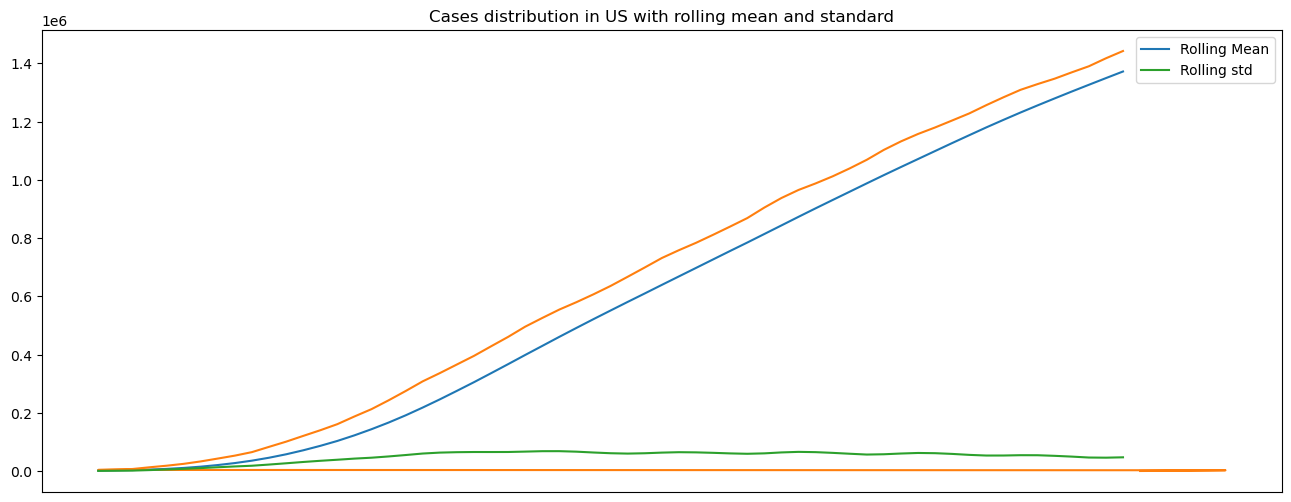

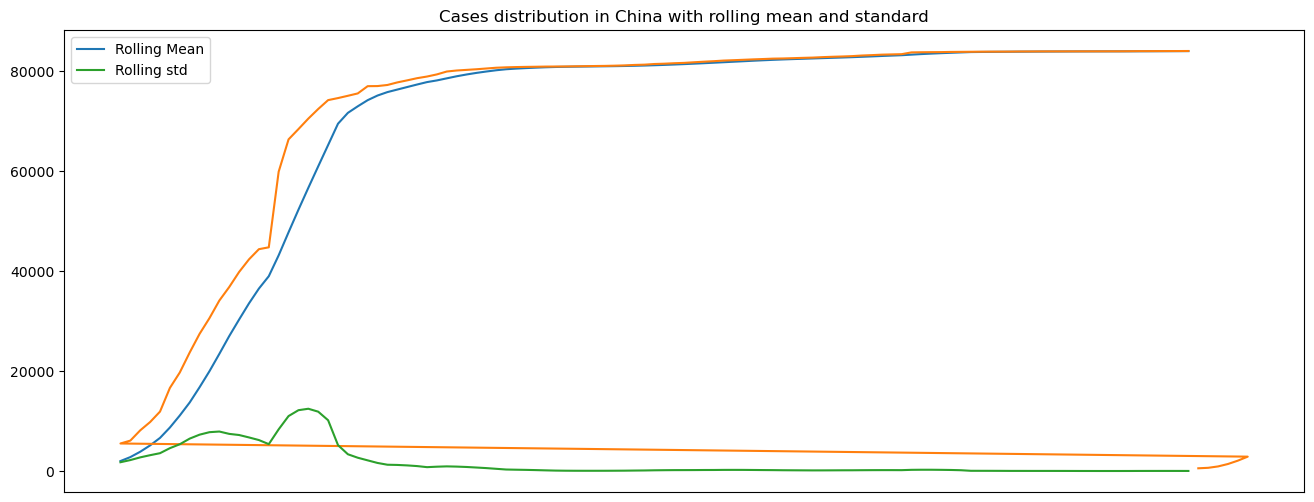

In [71]:
tsC1=roll('China')
rollPlot('China')
plt.show()

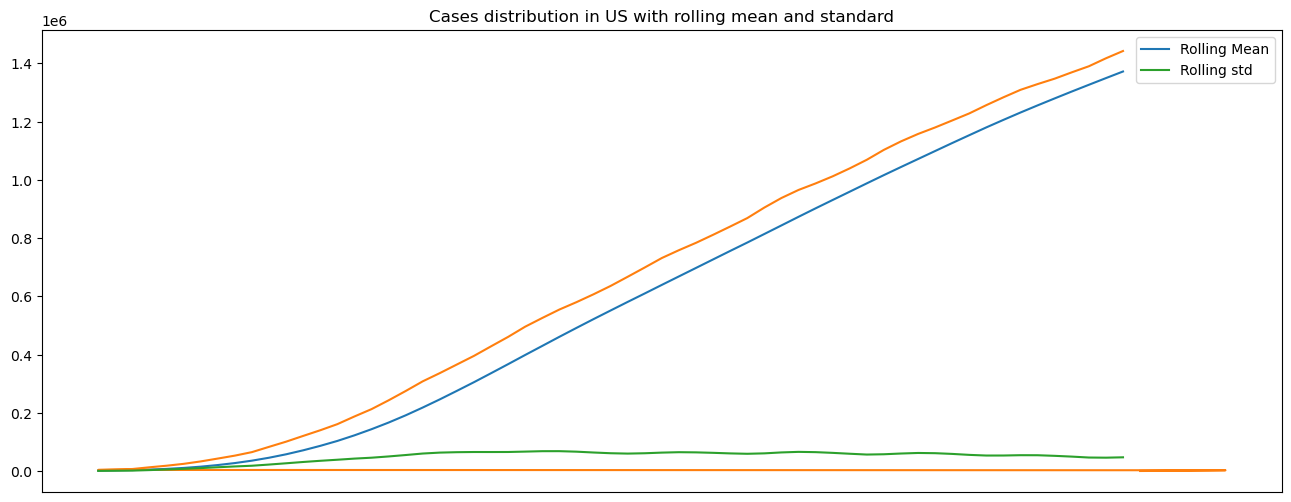

In [73]:
tsC2=roll('US')
rollPlot('US')
plt.show()

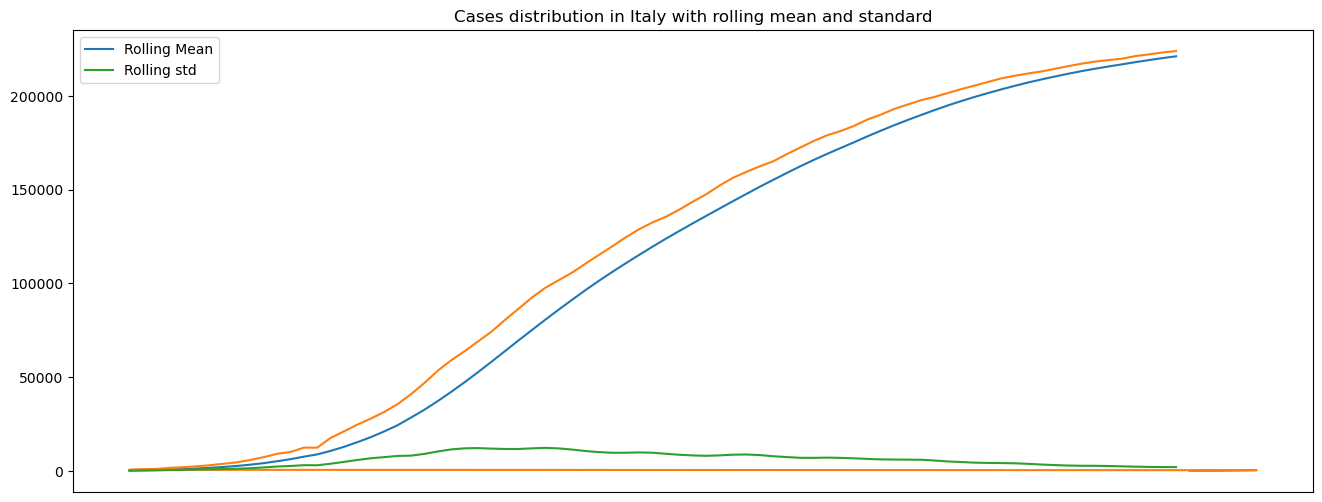

In [75]:
tsC3=roll('Italy')
rollPlot('Italy')
plt.show()

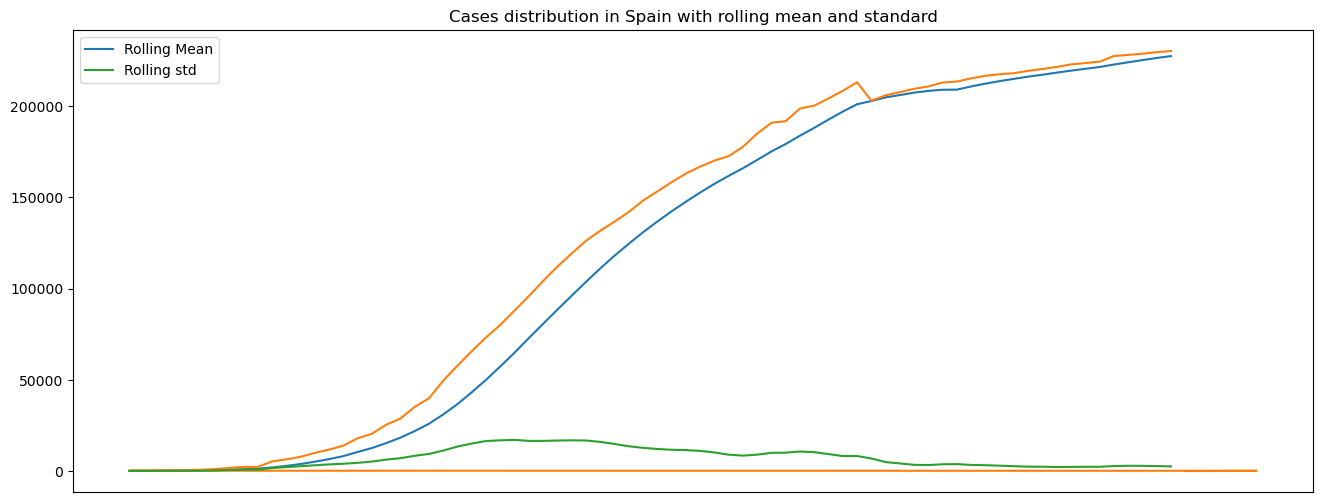

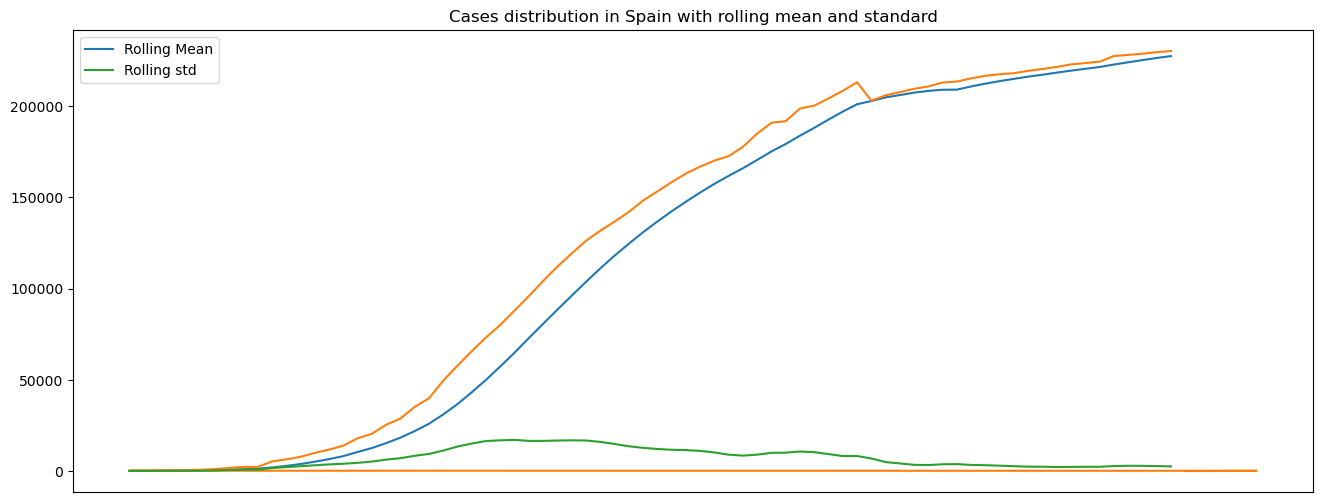

In [79]:
tsC4=roll('Spain')
rollPlot('Spain')
plt.show()

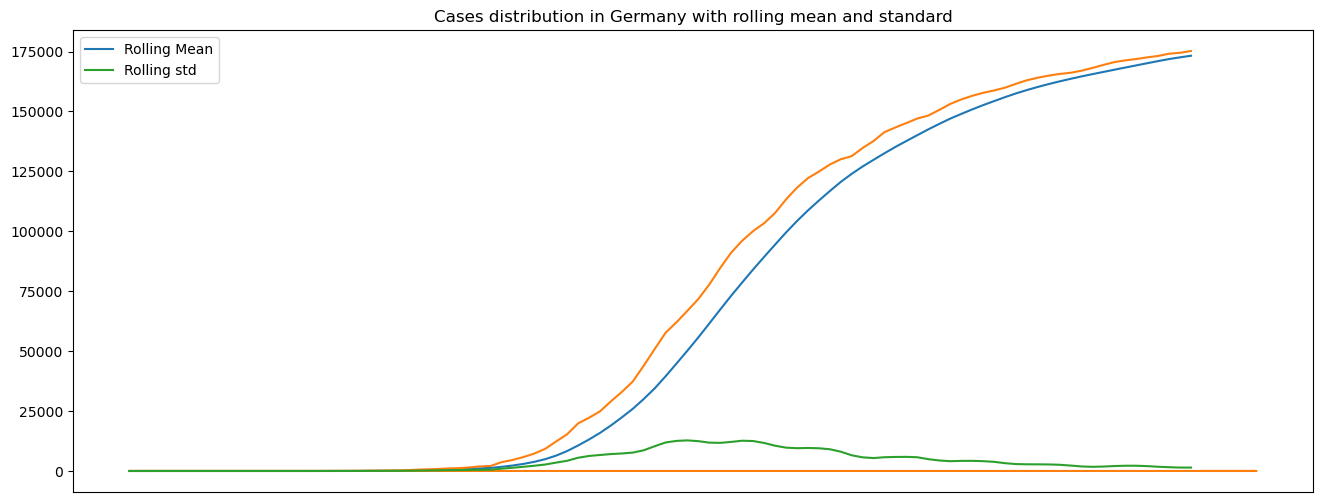

In [81]:
tsC5=roll('Germany')
rollPlot('Germany')
plt.show()

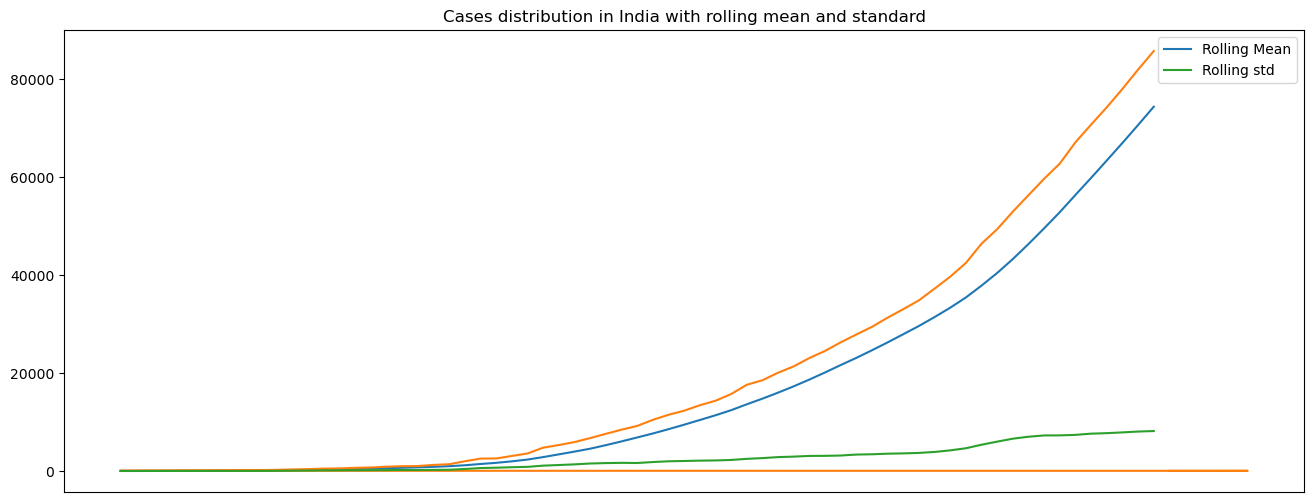

In [83]:
tsC6=roll('India')
rollPlot('India')
plt.show()

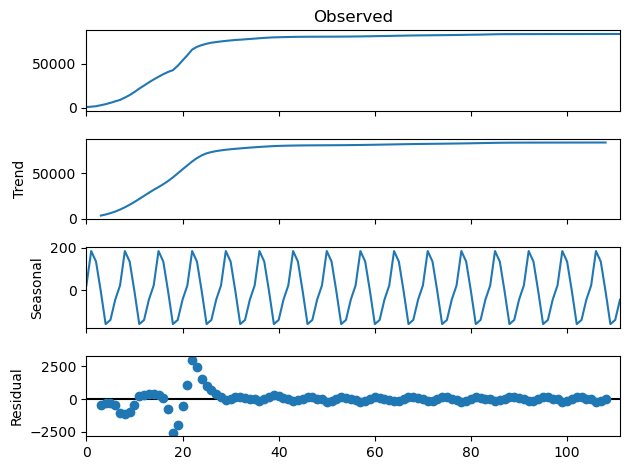

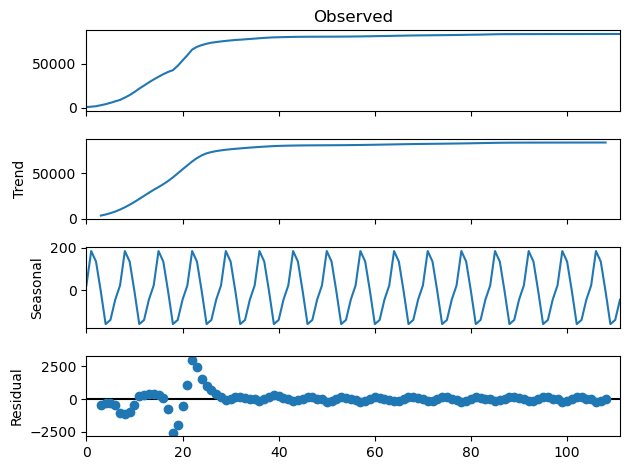

In [89]:
fig = sm.tsa.seasonal_decompose(tsC1.values, period=7).plot()
plt.show()

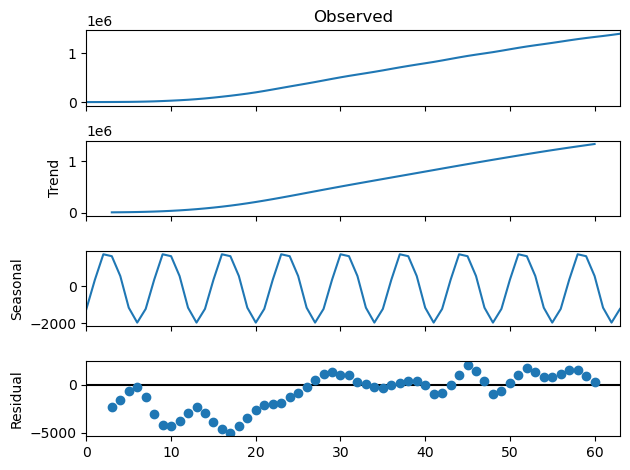

In [95]:
fig = sm.tsa.seasonal_decompose(tsC2.values,period=7).plot()
plt.show()

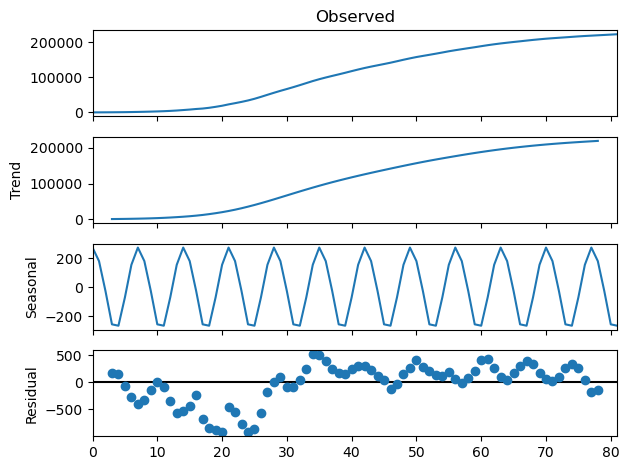

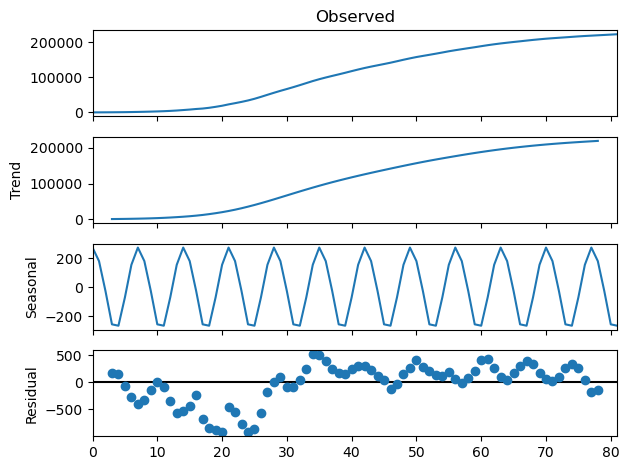

In [99]:
fig=sm.tsa.seasonal_decompose(tsC3.values,period=7).plot()
plt.show()

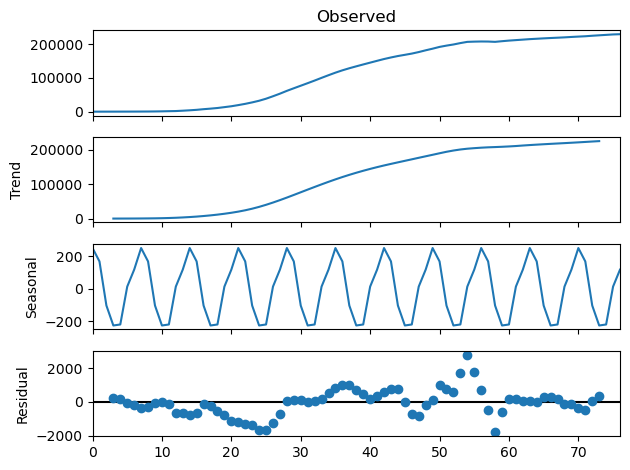

In [101]:
fig=sm.tsa.seasonal_decompose(tsC4.values,period=7).plot()
plt.show()

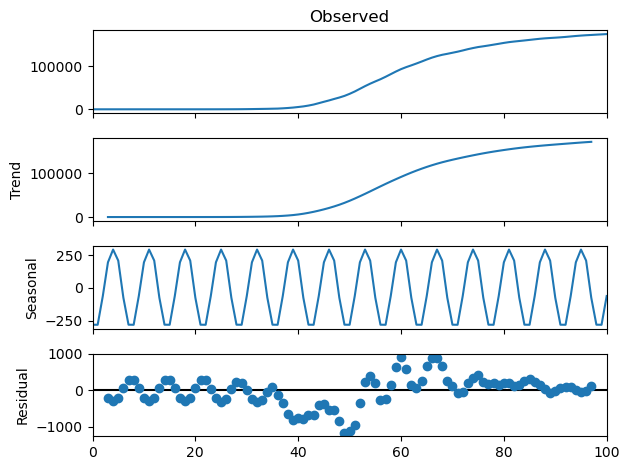

In [103]:
fig=sm.tsa.seasonal_decompose(tsC5.values,period=7).plot()
plt.show()

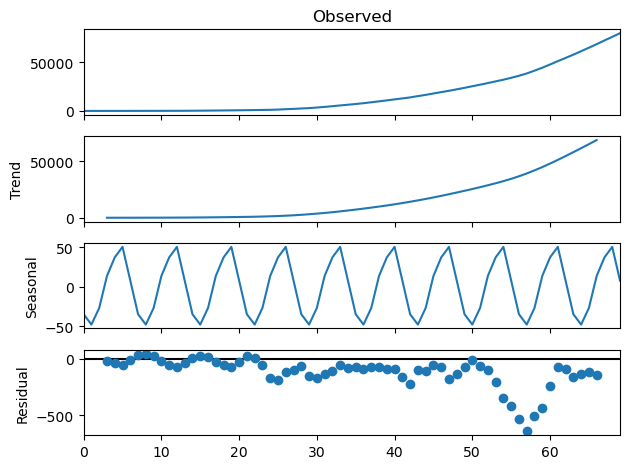

In [105]:
fig=sm.tsa.seasonal_decompose(tsC6.values,period=7).plot()
plt.show()

In [107]:
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)

#For China
tsC=tsC1['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -4.230209
p-value                         0.000585
#Lags Used                     13.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64


In [109]:
tsC

array([  879.25,  1261.  ,  1819.5 ,  2966.75,  4137.  ,  5653.5 ,
        7384.75,  8980.25, 11616.  , 14509.75, 17986.  , 21873.25,
       25362.5 , 28961.  , 32237.75, 35335.  , 38276.75, 40845.75,
       42832.  , 47848.5 , 53849.5 , 59856.25, 66294.75, 69429.5 ,
       71392.75, 72944.25, 74085.25, 74864.25, 75561.75, 76162.5 ,
       76703.5 , 77254.5 , 77545.75, 77940.25, 78362.  , 78762.5 ,
       79204.  , 79588.  , 79921.25, 80178.75, 80330.  , 80468.5 ,
       80595.75, 80705.  , 80785.75, 80835.  , 80872.75, 80900.  ,
       80921.25, 80943.75, 80964.25, 80989.5 , 81017.75, 81049.  ,
       81087.25, 81141.5 , 81203.25, 81286.5 , 81372.  , 81457.25,
       81546.25, 81633.  , 81732.75, 81834.75, 81950.  , 82054.  ,
       82149.5 , 82240.  , 82317.5 , 82395.75, 82461.75, 82522.  ,
       82580.25, 82632.  , 82698.5 , 82768.75, 82837.75, 82911.75,
       82993.  , 83075.5 , 83166.75, 83252.25, 83319.5 , 83456.25,
       83576.5 , 83688.75, 83792.25, 83815.5 , 83835.75, 83855

In [111]:
#For US
tsC=tsC2['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -0.950660
p-value                         0.770832
#Lags Used                      9.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


In [113]:
#For Italy
tsC=tsC3['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -1.702558
p-value                         0.429795
#Lags Used                      8.000000
Number of Observations Used    73.000000
Critical Value (1%)            -3.523284
Critical Value (5%)            -2.902031
Critical Value (10%)           -2.588371
dtype: float64


In [115]:
#For Spain
tsC=tsC4['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -2.264269
p-value                         0.183751
#Lags Used                      9.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


In [117]:
#For Germany
tsC=tsC5['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -0.996540
p-value                         0.754524
#Lags Used                     13.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


In [119]:
#For INdia
tsC=tsC6['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  0.457264
p-value                         0.983515
#Lags Used                      9.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


In [121]:
tsC7=tsC6['ConfirmedCases'].values

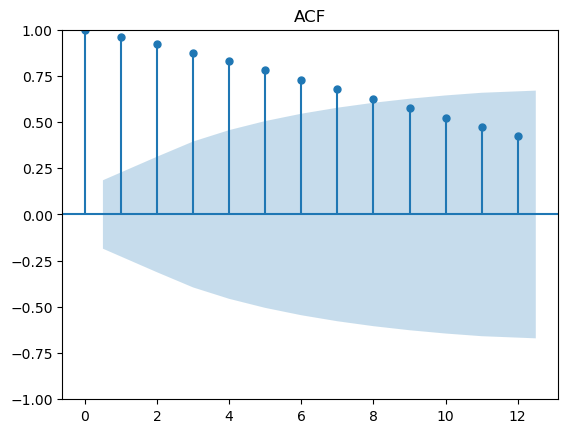

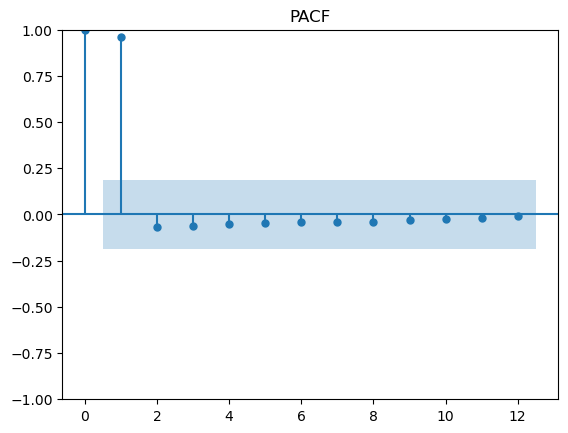

In [133]:
def corr(ts):
    plot_acf(ts,lags=12,title="ACF")
    plot_pacf(ts,lags=12,title="PACF")
    
#For China
corr(tsC1)
plt.show()

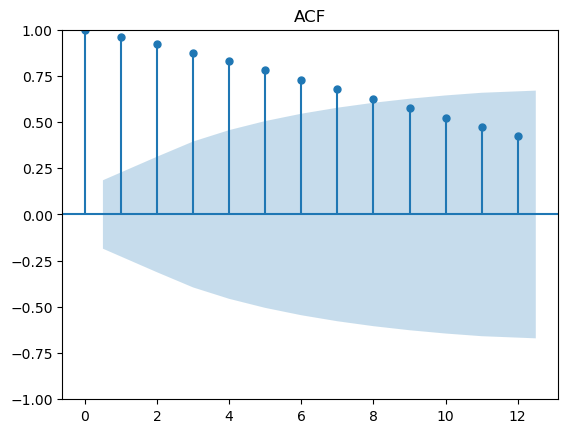

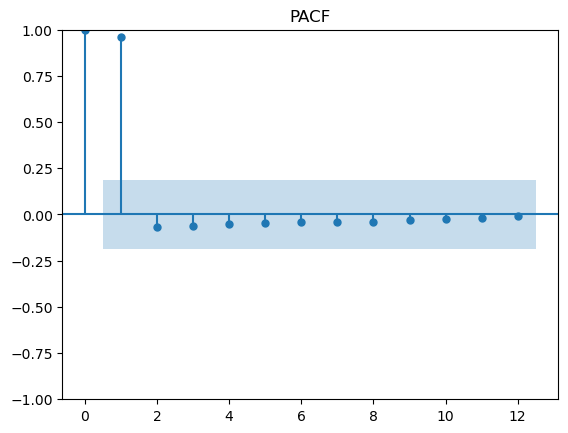

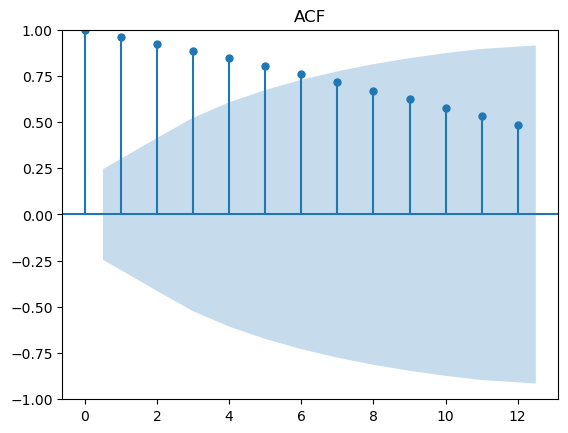

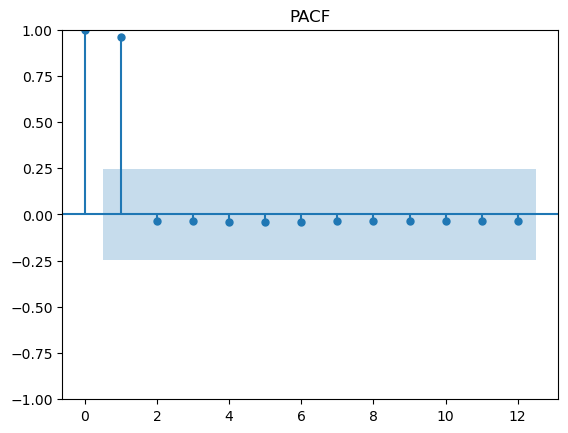

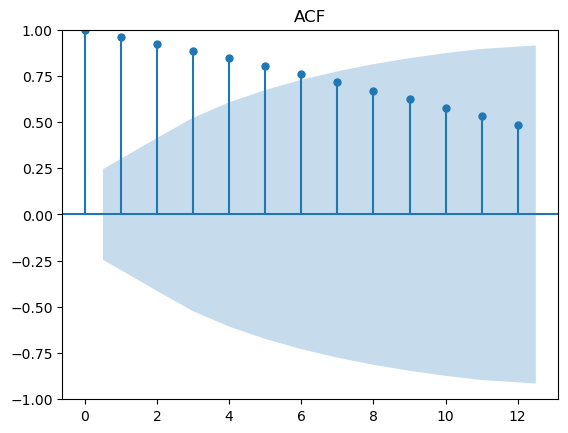

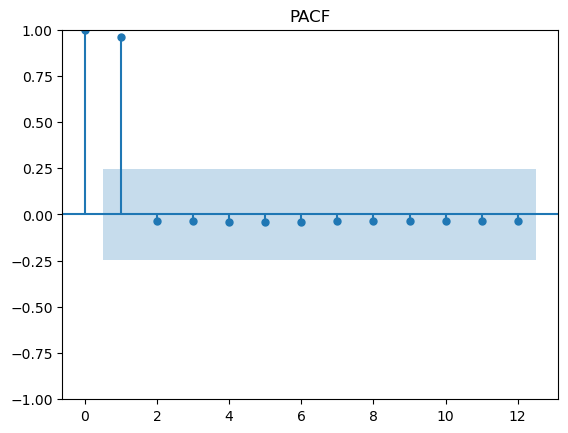

In [131]:
#For US
corr(tsC2)
plt.show()

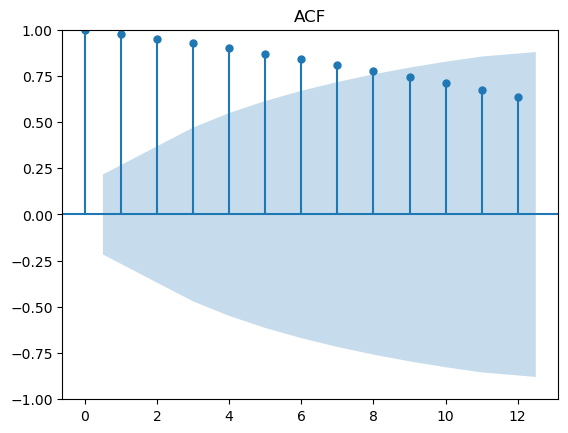

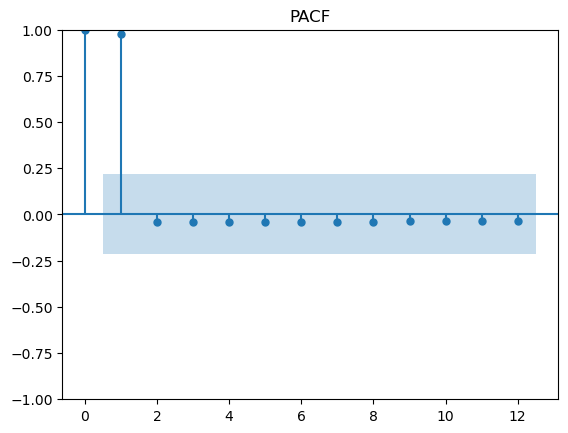

In [135]:
#For Italy
corr(tsC3)
plt.show()

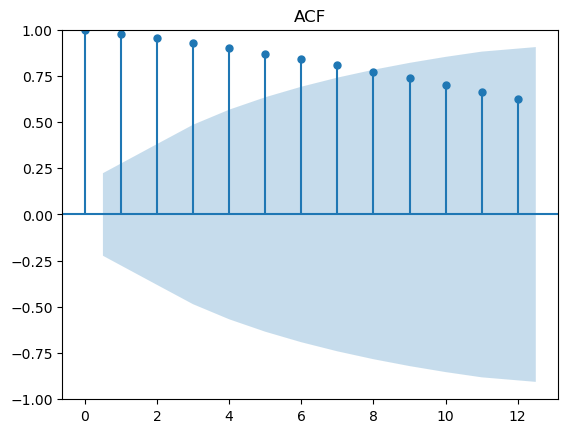

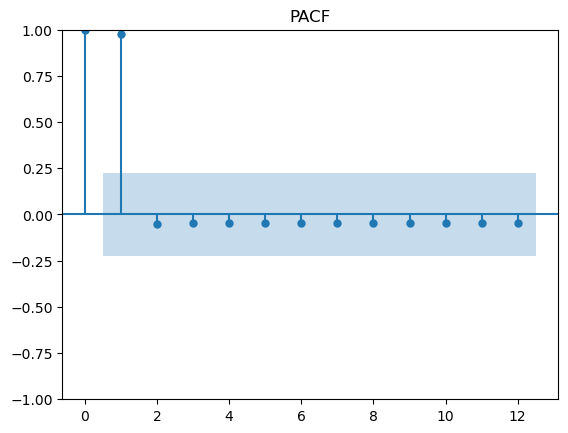

In [137]:
#For Spain
corr(tsC4)
plt.show()

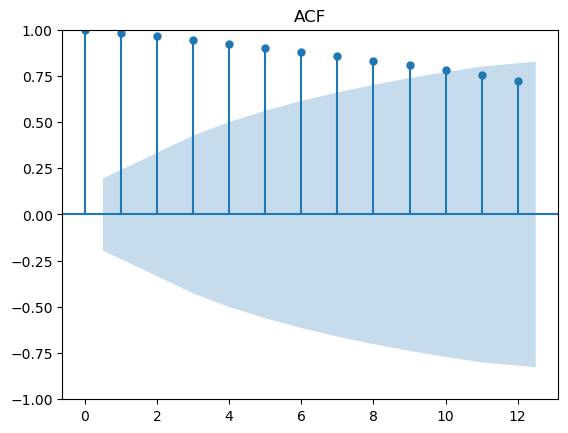

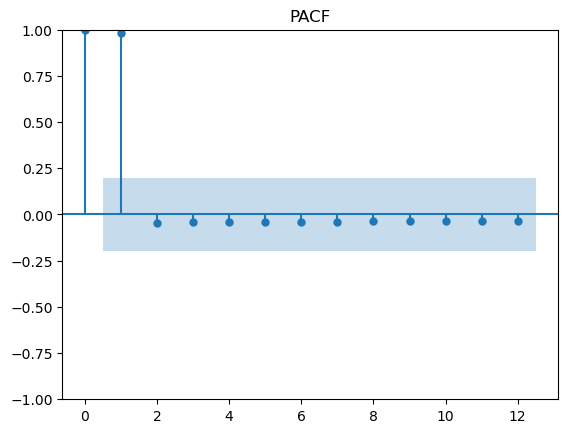

In [139]:
#For Germany
corr(tsC5)
plt.show()

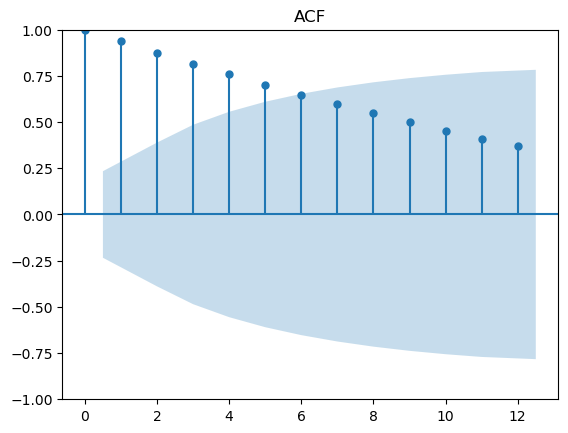

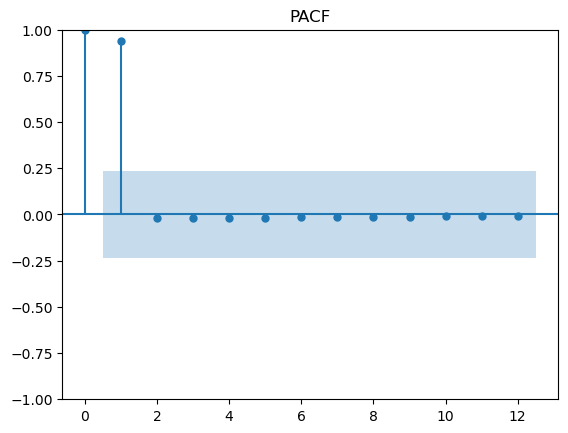

In [141]:
#For India
corr(tsC6)
plt.show()

In [143]:
#test['Date'] = pd.to_datetime(test['Date'])
#train['Date'] = pd.to_datetime(train['Date'])
train = train.set_index(['Date'])
test = test.set_index(['Date'])

In [145]:
train.shape

(35995, 5)

In [147]:
def create_features(df,label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['Date'] = df.index
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
   
    return X

In [213]:
import pandas as pd
import numpy as np

# Function to create features from datetime
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is datetime
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.isocalendar().week  # Updated line

    X = df[['hour', 'dayofweek', 'quarter', 'month', 'year',
            'dayofyear', 'dayofmonth', 'weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

# Example usage
train = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'Value': np.random.randint(100, 500, size=100),
    'Category': np.random.choice(['A', 'B', 'C'], size=100)  # Example categorical column
})
test = pd.DataFrame({
    'Date': pd.date_range(start='2023-04-10', periods=20, freq='D'),
    'Value': np.random.randint(100, 500, size=20),
    'Category': np.random.choice(['A', 'B', 'C'], size=20)  # Example categorical column
})

# Create features
train_features = pd.DataFrame(create_features(train))
test_features = pd.DataFrame(create_features(test))

# Combine features and target
features_and_target_train = pd.concat([train, train_features], axis=1)
features_and_target_test = pd.concat([test, test_features], axis=1)

# Display the results
print(features_and_target_train.head())
print(features_and_target_test.head())

        Date  Value Category  hour  dayofweek  quarter  month  year  \
0 2023-01-01    238        B     0          6        1      1  2023   
1 2023-01-02    420        B     0          0        1      1  2023   
2 2023-01-03    382        A     0          1        1      1  2023   
3 2023-01-04    237        B     0          2        1      1  2023   
4 2023-01-05    303        B     0          3        1      1  2023   

   dayofyear  dayofmonth  weekofyear  
0          1           1          52  
1          2           2           1  
2          3           3           1  
3          4           4           1  
4          5           5           1  
        Date  Value Category  hour  dayofweek  quarter  month  year  \
0 2023-04-10    259        C     0          0        2      4  2023   
1 2023-04-11    388        B     0          1        2      4  2023   
2 2023-04-12    149        C     0          2        2      4  2023   
3 2023-04-13    183        B     0          3        2 

In [219]:
# Check column names in the DataFrame
print(features_and_target_train.columns)

# Ensure 'ConfirmedCases' and 'Fatalities' exist in the DataFrame
if 'ConfirmedCases' not in features_and_target_train.columns:
    # Add 'ConfirmedCases' column with default values (replace with actual data)
    features_and_target_train['ConfirmedCases'] = 0
    features_and_target_test['ConfirmedCases'] = 0

if 'Fatalities' not in features_and_target_train.columns:
    # Add 'Fatalities' column with default values (replace with actual data)
    features_and_target_train['Fatalities'] = 0
    features_and_target_test['Fatalities'] = 0

# Define features and target variables
x_train = features_and_target_train[['Country_Region', 'month', 'dayofyear', 'dayofmonth', 'weekofyear']]
y1 = features_and_target_train[['ConfirmedCases']]
y2 = features_and_target_train[['Fatalities']]
x_test = features_and_target_test[['Country_Region', 'month', 'dayofyear', 'dayofmonth', 'weekofyear']]

# Display the results
print(x_train.head())
print(y1.head())
print(y2.head())
print(x_test.head())

Index(['Date', 'Value', 'Category', 'hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'Country_Region'],
      dtype='object')
    Country_Region  month  dayofyear  dayofmonth  weekofyear
0  Default_Country      1          1           1          52
1  Default_Country      1          2           2           1
2  Default_Country      1          3           3           1
3  Default_Country      1          4           4           1
4  Default_Country      1          5           5           1
   ConfirmedCases
0               0
1               0
2               0
3               0
4               0
   Fatalities
0           0
1           0
2           0
3           0
4           0
    Country_Region  month  dayofyear  dayofmonth  weekofyear
0  Default_Country      4        100          10          15
1  Default_Country      4        101          11          15
2  Default_Country      4        102          12          15
3  Default_Country      

In [221]:
tsC

2023-01-01    313
2023-01-02    277
2023-01-03    480
2023-01-04    212
2023-01-05    134
             ... 
2023-04-06    201
2023-04-07    333
2023-04-08    422
2023-04-09    490
2023-04-10    255
Freq: D, Length: 100, dtype: int32

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 2, 2)   Log Likelihood                -516.382
Date:                Sun, 02 Mar 2025   AIC                           1044.764
Time:                        00:36:09   BIC                           1059.277
Sample:                    01-01-2023   HQIC                          1050.594
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0455      0.107     -0.424      0.672      -0.256       0.165
ar.L2         -0.1224      0.113     -1.083      0.279      -0.344       0.099
ar.L3         -0.2700      0.116     -2.319      0.0

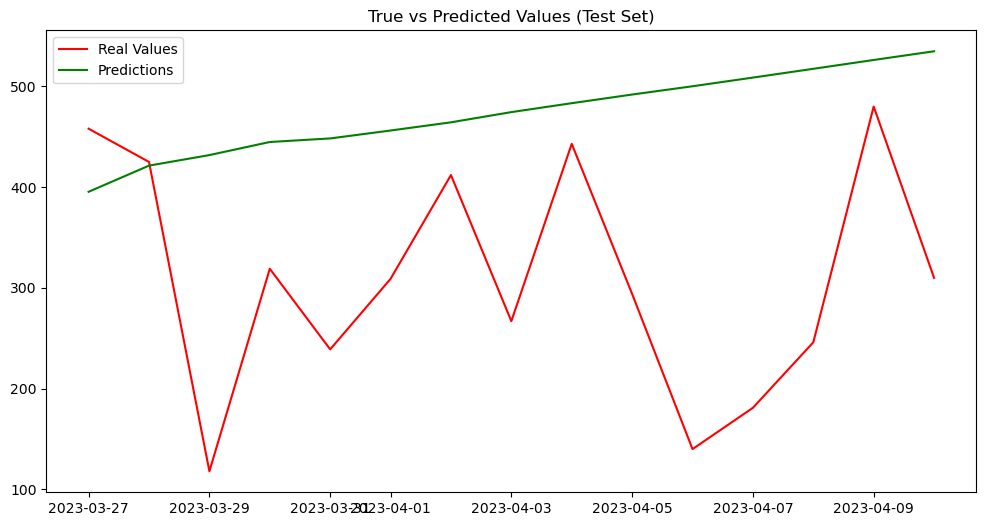


Mean absolute percentage error: 83.517315
Mean Square Error using ARIMA:  42252.027679856816
Root Mean Square Error using ARIMA:  205.55298022616168
R2 Score using ARIMA:  -2.4102524633235984
        MAPE          MSE       RMSE
0  83.517315  42252.02768  205.55298


MAPE          MSE         RMSE
ARIMA  12.359226  136903300.0  11700.56851

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score

# Define evaluation metrics
def r2score(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return r2_score(y1, y_pred)

def mape(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean(np.abs((y1 - y_pred) / y1)) * 100

def mse(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean((y1 - y_pred)**2)

def rmse(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.sqrt(np.mean((y1 - y_pred)**2))

# Split the time series into train and test sets
def split(ts):
    size = int(len(ts) * 0.85)
    train = ts[:size]
    test = ts[size:]
    return train, test

# ARIMA modeling and evaluation
def arima(ts, test):
    p = d = q = range(0, 6)
    a = float('inf')  # Initialize AIC with a large value
    pdq = list(itertools.product(p, d, q))
    param = None  # Initialize param

    # Determine the best parameters
    for var in pdq:
        try:
            model = ARIMA(ts, order=var)
            result = model.fit()
            if result.aic < a:
                a = result.aic
                param = var
        except:
            continue

    # Check if param was assigned a value
    if param is None:
        raise ValueError("No valid ARIMA parameters found. Check your data or parameter range.")

    # Modeling with the best parameters
    model = ARIMA(ts, order=param)
    result = model.fit()

    # Print the ARIMA model results
    print(result.summary())

    # Forecast on the test set
    pred = result.predict(start=len(ts), end=len(ts) + len(test) - 1)

    # Plotting results for the test set
    plt.figure(figsize=(12, 6))
    plt.plot(test.index, test, c='red', label='Real Values')
    plt.plot(test.index, pred, c='green', label='Predictions')
    plt.legend()
    plt.title('True vs Predicted Values (Test Set)')
    plt.show()

    # Printing the error metrics
    print('\nMean absolute percentage error: %f' % mape(test, pred))
    print("Mean Square Error using ARIMA: ", mse(test, pred))
    print("Root Mean Square Error using ARIMA: ", rmse(test, pred))
    print("R2 Score using ARIMA: ", r2score(test, pred))

    # Create a DataFrame for metrics
    metrics_df = pd.DataFrame({
        'MAPE': [mape(test, pred)],
        'MSE': [mse(test, pred)],
        'RMSE': [rmse(test, pred)]
    })
    return pred, metrics_df

# Example usage
# Ensure `tsC` is a pandas Series with a datetime index
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randint(100, 500, size=100)  # Replace with your actual data
tsC = pd.Series(values, index=dates)

train, test = split(tsC)  # Split the time series
pred, metrics_df = arima(train, test)
print(metrics_df)

dd2.rename(index={0: 'ARIMA'})


In [278]:
pip install TimeseriesGenerator

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement TimeseriesGenerator (from versions: none)
ERROR: No matching distribution found for TimeseriesGenerator


In [280]:
import tensorflow as tf

# Example usage
n_input = 5
n_features = 1

# Reshape the data
NtsC = np.reshape(train, (-1, 1))
test2 = np.reshape(test, (-1, 1))

# Create a TensorFlow Dataset
dataset = tf.data.Dataset.from_tensor_slices((NtsC, NtsC))

# Create sequences
def create_sequences(data, targets, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(targets[i + sequence_length])
    return np.array(sequences), np.array(labels)

# Generate sequences
X, y = create_sequences(NtsC, NtsC, n_input)

# Convert to TensorFlow Dataset
dataset = tf.data.Dataset.from_tensor_slices((X, y))

# Batch the dataset
batch_size = 1
dataset = dataset.batch(batch_size)

# Example of iterating through the dataset
for batch_data, batch_targets in dataset:
    print("Batch Data:", batch_data.numpy())
    print("Batch Targets:", batch_targets.numpy())

Batch Data: [[[189]
  [121]
  [449]
  [112]
  [331]]]
Batch Targets: [[353]]
Batch Data: [[[121]
  [449]
  [112]
  [331]
  [353]]]
Batch Targets: [[321]]
Batch Data: [[[449]
  [112]
  [331]
  [353]
  [321]]]
Batch Targets: [[340]]
Batch Data: [[[112]
  [331]
  [353]
  [321]
  [340]]]
Batch Targets: [[233]]
Batch Data: [[[331]
  [353]
  [321]
  [340]
  [233]]]
Batch Targets: [[269]]
Batch Data: [[[353]
  [321]
  [340]
  [233]
  [269]]]
Batch Targets: [[351]]
Batch Data: [[[321]
  [340]
  [233]
  [269]
  [351]]]
Batch Targets: [[489]]
Batch Data: [[[340]
  [233]
  [269]
  [351]
  [489]]]
Batch Targets: [[337]]
Batch Data: [[[233]
  [269]
  [351]
  [489]
  [337]]]
Batch Targets: [[415]]
Batch Data: [[[269]
  [351]
  [489]
  [337]
  [415]]]
Batch Targets: [[186]]
Batch Data: [[[351]
  [489]
  [337]
  [415]
  [186]]]
Batch Targets: [[440]]
Batch Data: [[[489]
  [337]
  [415]
  [186]
  [440]]]
Batch Targets: [[194]]
Batch Data: [[[337]
  [415]
  [186]
  [440]
  [194]]]
Batch Targets: [[402]]

In [284]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5
n_features = 1
NtsC=np.reshape(train,(-1,1))
test2=np.reshape(test,(-1,1))

generator = TimeseriesGenerator(NtsC, NtsC, length=n_input, batch_size=1)

test2.shape

(15, 1)

In [286]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [288]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 150)                 │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,351 (356.84 KB)

 Trainable params: 91,351 (356.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11210.5479 
Epoch 2/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16925.3848 
Epoch 3/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10513.6348
Epoch 4/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10747.6855 
Epoch 5/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15288.6123
Epoch 6/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8812.1543
Epoch 7/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12398.6104   
Epoch 8/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10713.1719   
Epoch 9/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14466.9707 
Epoch 10/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12377.1016  
Epoch 11/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10664.8682
Epoch 12/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12829.7939
Epoch 13/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10517.9512
Epoch 14/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13778.5078  
Epoch 15/25
80/8

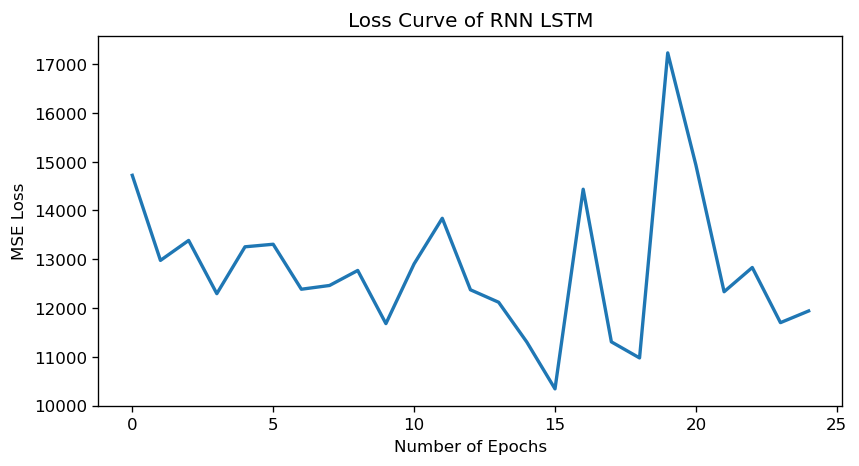

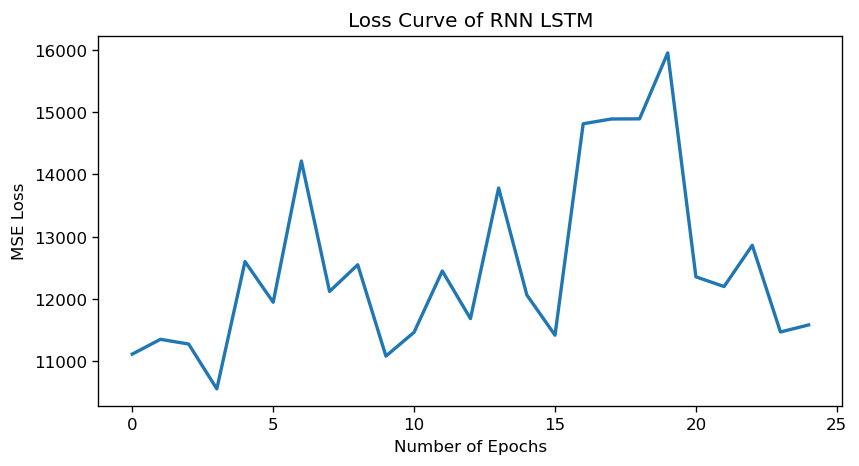

In [300]:
model.fit(generator,epochs=25)
loss_per_epoch = model.history.history['loss']
fig = plt.figure(dpi = 120,figsize = (8,4))
ax = plt.axes()
ax.set(xlabel = 'Number of Epochs',ylabel = 'MSE Loss',title = 'Loss Curve of RNN LSTM')
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,lw = 2)
plt.show()


In [302]:
test_predictions = []

first_eval_batch = NtsC[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test2)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)     
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [304]:
test_predictions=np.ravel(test_predictions)

In [314]:
import pandas as pd

# Create an empty DataFrame with specified columns
pred = pd.DataFrame(columns=["current", "prediction"])



In [318]:
pred["current"]=test
pred["prediction"]=test_predictions
pred

current  prediction
2023-03-27      458  339.083984
2023-03-28      425  446.277130
2023-03-29      118  348.623474
2023-03-30      319  435.095490
2023-03-31      239  317.642731
2023-04-01      309  440.464539
2023-04-02      412  319.135803
2023-04-03      267  454.295990
2023-04-04      443  313.137787
2023-04-05      294  450.735687
2023-04-06      140  316.264099
2023-04-07      181  468.895752
2023-04-08      246  318.677856
2023-04-09      480  465.384583
2023-04-10      310  326.602356

In [320]:
dd3=pd.DataFrame(columns=['MAPE','MSE','RMSE'])
dd3

Empty DataFrame
Columns: [MAPE, MSE, RMSE]
Index: []

In [322]:
def mape(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean(np.abs((y1 - y_pred) / y1)) * 100

def mse(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean((y1 - y_pred)**2)

def rmse(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.sqrt(np.mean((y1 - y_pred)**2))
def r2score(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return r2_score(y1, y_pred)

print("Mean absolute % error using LSTM: ",mape(pred["current"],pred["prediction"]))
print("Mean Square Error error using LSTM: ",mse(pred["current"],pred["prediction"]))
print("Root Mean Square error using LSTM: ",rmse(pred["current"],pred["prediction"]))
print("R2 score using LSTM: ",r2score(pred["current"],pred["prediction"]))
dd3=pd.DataFrame({'MAPE': [mape(pred["current"],pred["prediction"])], 'MSE': [mse(pred["current"],pred["prediction"])], 'RMSE': [rmse(pred["current"],pred["prediction"])]}, index=[1])

Mean absolute % error using LSTM:  55.76516039134428
Mean Square Error error using LSTM:  20638.98810689139
Root Mean Square error using LSTM:  143.66275824614877
R2 score using LSTM:  -0.665817379951477


In [324]:
dd3.rename({1:'LSTM'})

MAPE           MSE        RMSE
LSTM  55.76516  20638.988107  143.662758

In [326]:
dd4=pd.concat([dd2,dd3])

In [328]:
dd4.rename({0:'ARIMA', 1:'LSTM'})

MAPE           MSE          RMSE
ARIMA  12.359226  1.369033e+08  11700.568510
LSTM   55.765160  2.063899e+04    143.662758

In [340]:
f,ax=plt.subplots()
plt.plot(test_predictions,c='green', label= 'predictions')

plt.plot(test, c='red',label='real values')
plt.legend()
plt.title('True vs predicted values')


Text(0.5, 1.0, 'True vs predicted values')

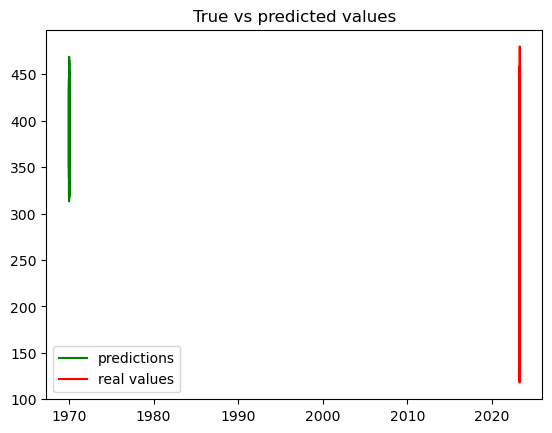

In [342]:
plt.show()

In [350]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5
n_features = 1
NtsC=np.reshape(tsC,(-1,1))

generator = TimeseriesGenerator(NtsC, NtsC, length=n_input, batch_size=1)

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(generator,epochs=25)
loss_per_epoch = model.history.history['loss']
fig = plt.figure(dpi = 120,figsize = (8,4))
ax = plt.axes()
ax.set(xlabel = 'Number of Epochs',ylabel = 'MSE Loss',title = 'Loss Curve of RNN LSTM')
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,lw = 2)

Epoch 1/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 31566.5566  
Epoch 2/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 19123.3633   
Epoch 3/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 19252.2617   
Epoch 4/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13339.0273 
Epoch 5/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17847.7793   
Epoch 6/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17023.1797  
Epoch 7/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13398.8369
Epoch 8/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18216.2578   
Epoch 9/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17526.3691   
Epoch 10/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16696.9551 
Epoch 11/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 17304.7266   
Epoch 12/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14833.7363 
Epoch 13/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13123.7051 
Epoch 14/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12352.5205 
Ep

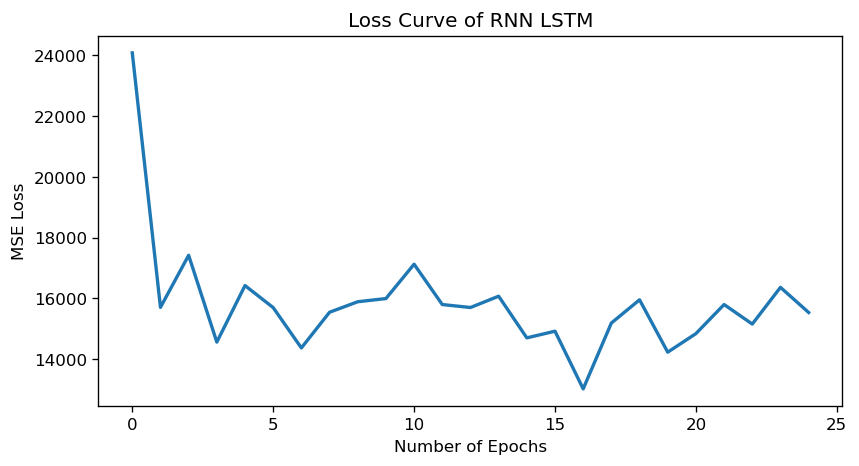

In [352]:
plt.show()

In [354]:
forecast = []

first_eval_batch = NtsC[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(15):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [356]:
forecast = pd.DataFrame({'Forecast':np.ravel(forecast)})
forecast.index = np.arange('2020-05-15',15,dtype='datetime64[D]')
forecast

Forecast
2020-05-15  254.139771
2020-05-16  289.759338
2020-05-17  378.224640
2020-05-18  373.479156
2020-05-19  306.370544
2020-05-20  288.747803
2020-05-21  313.535187
2020-05-22  371.615997
2020-05-23  330.085815
2020-05-24  305.898529
2020-05-25  306.724304
2020-05-26  324.379608
2020-05-27  333.471771
2020-05-28  316.608124
2020-05-29  308.682770

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('covid19_data.csv')  # Replace with the actual file name

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Preprocess the data (if needed)
# Example: Convert date to datetime format
data['date'] = pd.to_datetime(data['date'])

# Save the cleaned data to a CSV file (optional)
data.to_csv('cleaned_covid_data.csv', index=False)